In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the Data:
Customer_details= pd.read_excel('5.-Jumbled-up-Customers-Details.xlsx')
Customer_details

,Name Hussein Hakeem Address Number 22 Fioye Crescent Surulere Lagos Age 17 Gender Male
0,Name Arojoye Samuel Address 11 Omolade Close O...
1,"Name Alex Ezurum Address 1 Adamu Lane, Abuja A..."
2,Name Susan Nwaimo Address Number 58 Yaba Stree...
3,Name Ajao Opeyemi Address No12 Olubunmi Street...
4,Name Banjoko Adebusola Address 34 Ngige Street...
5,"Name Muhammed Olabisi Address 13, ICAN road, E..."
6,"Name Oluwagbemi Mojisola Address ACCA Lane, On..."


In [3]:
# Define a function to split the jumbled data
def split_customer_details(row):
    data = row[0]  # Get the string from the single column
    parts = data.split('Address')
    name_part = parts[0].split('Name')[1].strip()
    address_part = 'Address' + parts[1]
    address_parts = address_part.split('Age')
    address = address_parts[0].replace('Address', '').strip()
    age_gender_part = 'Age' + address_parts[1]
    age_gender_parts = age_gender_part.split('Gender')
    age = age_gender_parts[0].replace('Age', '').strip()
    gender = age_gender_parts[1].replace('Gender', '').strip()
    
    return pd.Series([name_part, address, age, gender])

In [4]:
# Define a function to extract state from address
def extract_state(address):
    # List of Nigerian states
    nigerian_states = [
        'Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa', 'Benue', 'Borno', 'Cross River',
        'Delta', 'Ebonyi', 'Edo', 'Ekiti', 'Enugu', 'FCT', 'Gombe', 'Imo', 'Jigawa', 'Kaduna', 'Kano', 
        'Katsina', 'Kebbi', 'Kogi', 'Kwara', 'Lagos', 'Nasarawa', 'Niger', 'Ogun', 'Ondo', 'Osun', 'Oyo', 
        'Plateau', 'Rivers', 'Sokoto', 'Taraba', 'Yobe', 'Zamfara'
    ]

    
    # Dictionary of cities and their corresponding states
    city_states = {
        'Onitsha': 'Anambra',
        'Abeokuta': 'Ogun'
        # Add more city-state mappings as needed
    }
    
    # Add FCT (Federal Capital Territory) for Abuja
    if 'Abuja' in address:
        return 'FCT'
    
    # Search for Nigerian state names in the address
    for state in nigerian_states:
        if state in address:
            return state
    
    # Search for city names and map them to their corresponding states
    for city, state in city_states.items():
        if city in address:
            return state
    
    # If no state is found, return 'Unknown'
    return 'Unknown'

In [5]:
# Apply the function to each row
cleaned_data = Customer_details.apply(split_customer_details, axis=1)

C:\Users\Henry Morgan\AppData\Local\Temp\ipykernel_5456\2843216773.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = row[0]  # Get the string from the single column


In [6]:
# Rename the columns
cleaned_data.columns = ['Name', 'Address', 'Age', 'Gender']

In [7]:
# Extract state from each address
cleaned_data['State'] = cleaned_data['Address'].apply(extract_state)

In [8]:
# Display the cleaned data
cleaned_data

,Name,Address,Age,Gender,State
0,Arojoye Samuel,11 Omolade Close Omole Estate Lagos,16,Male,Lagos
1,Alex Ezurum,"1 Adamu Lane, Abuja",14,Male,FCT
2,Susan Nwaimo,"Number 58 Yaba Street, Kaduna State",16,Female,Kaduna
3,Ajao Opeyemi,"No12 Olubunmi Street, Abeokuta",18,Female,Ogun
4,Banjoko Adebusola,"34 Ngige Street, Ugheli, Delta",14,Female,Delta
5,Muhammed Olabisi,"13, ICAN road, Enugu",12,Female,Enugu
6,Oluwagbemi Mojisola,"ACCA Lane, Onitsha",13,Female,Anambra


C:\Users\Henry Morgan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


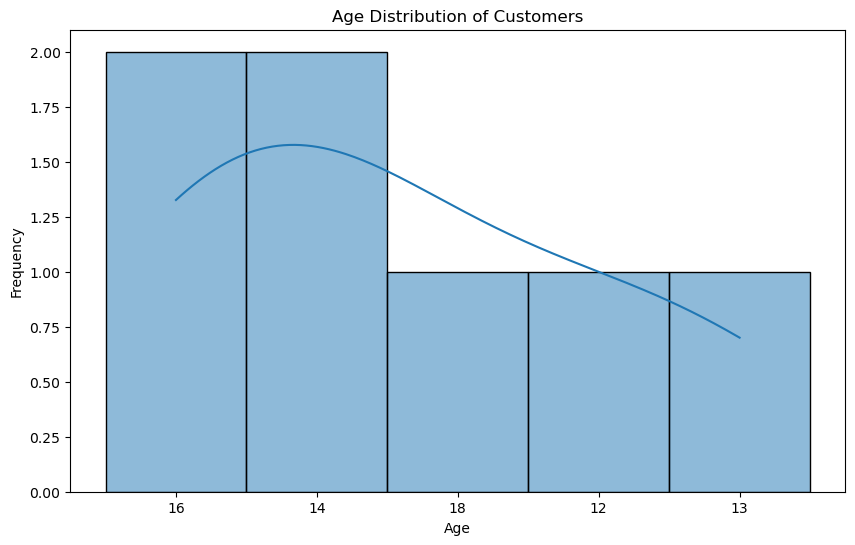

In [9]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Age'], bins=10, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

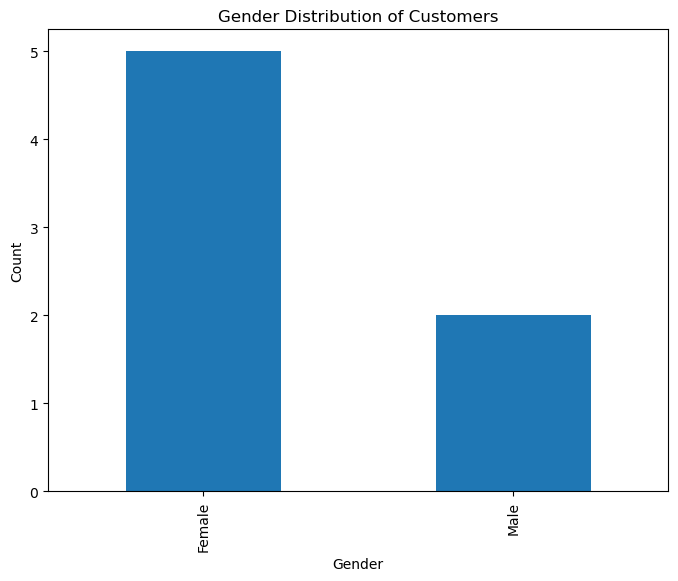

In [10]:
# Gender Distribution
gender_counts = cleaned_data['Gender'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

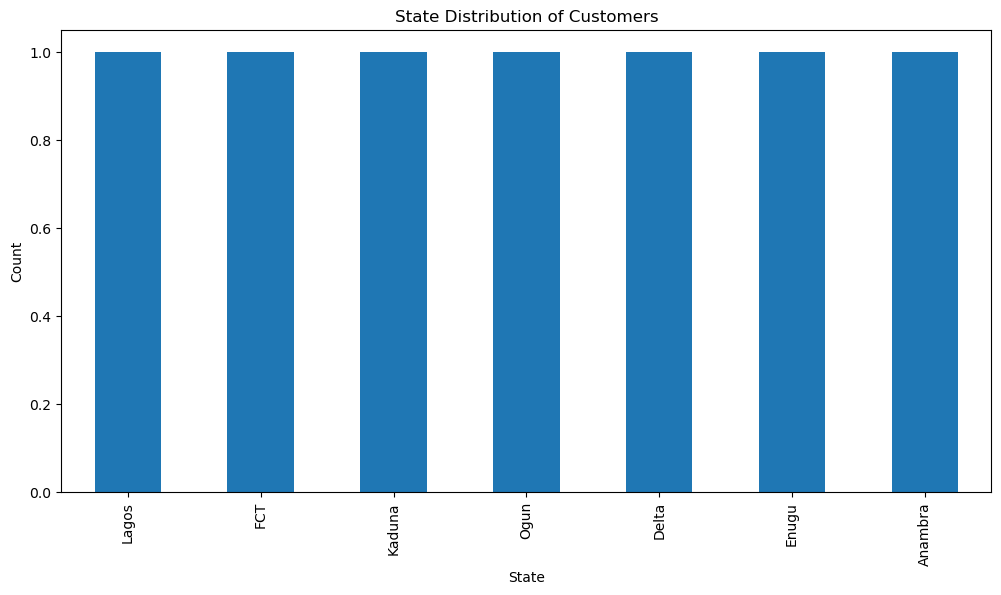

In [11]:
# State Distribution
state_counts = cleaned_data['State'].value_counts()
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar')
plt.title('State Distribution of Customers')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

In [12]:
# Check for missing values
missing_values = cleaned_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Name       0
Address    0
Age        0
Gender     0
State      0
dtype: int64


In [13]:
# Check for duplicates
duplicate_rows = cleaned_data.duplicated().sum()
print("\nDuplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
0


In [14]:
# Check data types
data_types = cleaned_data.dtypes
print("\nData Types:")
print(data_types)


Data Types:
Name       object
Address    object
Age        object
Gender     object
State      object
dtype: object


In [15]:
# Convert Age column to numeric
cleaned_data['Age'] = pd.to_numeric(cleaned_data['Age'], errors='coerce')

In [16]:
# Create age groups
bins = [0, 18, 35, 50, 100]
labels = ['0-18', '19-35', '36-50', '51+']
cleaned_data['Age_Group'] = pd.cut(cleaned_data['Age'], bins=bins, labels=labels, right=False)

In [17]:
# Define a function to map states to regions
def map_state_to_region(state):
    # Regions mapping dictionary
    regions = {
        'Lagos': 'South West',
        'Abuja': 'North Central',
        'Kano': 'North West',
        'Anambra': 'South East',
        'Rivers': 'South South',
        'Ogun': 'South West',
        'Kaduna': 'North West',
        'Enugu': 'South East',
        'Delta': 'South South',
        'Ondo': 'South West',
        'Kogi': 'North Central',
        'Plateau': 'North Central',
        'Edo': 'South South',
        'Oyo': 'South West',
        'Adamawa': 'North East',
        'Nasarawa': 'North Central',
        'Ekiti': 'South West',
        'Benue': 'North Central',
        'Akwa Ibom': 'South South',
        'Kwara': 'North Central',
        'Sokoto': 'North West',
        'Bauchi': 'North East',
        'Ondo': 'South West',
        'Kebbi': 'North West',
        'Cross River': 'South South',
        'Imo': 'South East',
        'Jigawa': 'North West',
        'Gombe': 'North East',
        'Osun': 'South West',
        'Niger': 'North Central',
        'Zamfara': 'North West',
        'Bayelsa': 'South South',
        'Ebonyi': 'South East',
        'Yobe': 'North East',
        'Taraba': 'North East',
        'Borno': 'North East',
        'Katsina': 'North West',
        'FCT': 'North Central',  # Correcting Abuja to North Central
        # Add more state-region mappings as needed
    }
    
    # Return the region corresponding to the state
    return regions.get(state, 'Other')

# Map states to regions
cleaned_data['Region'] = cleaned_data['State'].apply(map_state_to_region)

In [18]:
cleaned_data

,Name,Address,Age,Gender,State,Age_Group,Region
0,Arojoye Samuel,11 Omolade Close Omole Estate Lagos,16,Male,Lagos,0-18,South West
1,Alex Ezurum,"1 Adamu Lane, Abuja",14,Male,FCT,0-18,North Central
2,Susan Nwaimo,"Number 58 Yaba Street, Kaduna State",16,Female,Kaduna,0-18,North West
3,Ajao Opeyemi,"No12 Olubunmi Street, Abeokuta",18,Female,Ogun,19-35,South West
4,Banjoko Adebusola,"34 Ngige Street, Ugheli, Delta",14,Female,Delta,0-18,South South
5,Muhammed Olabisi,"13, ICAN road, Enugu",12,Female,Enugu,0-18,South East
6,Oluwagbemi Mojisola,"ACCA Lane, Onitsha",13,Female,Anambra,0-18,South East


C:\Users\Henry Morgan\AppData\Local\Temp\ipykernel_5456\4261664060.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = X['Gender'].map({'Male': 0, 'Female': 1})
C:\Users\Henry Morgan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


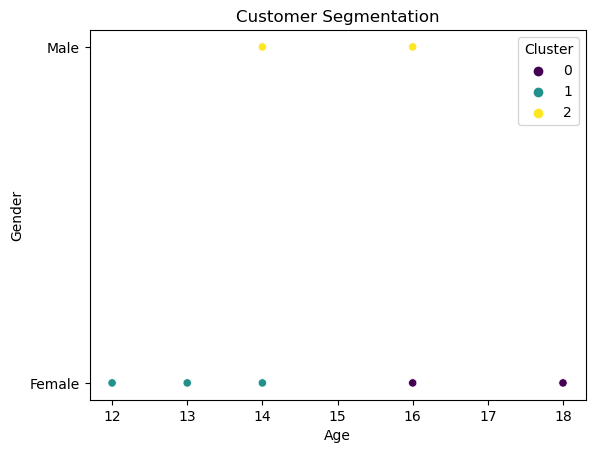

In [19]:
from sklearn.cluster import KMeans

# Prepare data for clustering
X = cleaned_data[['Age', 'Gender']]

# Convert categorical variables to numerical
X['Gender'] = X['Gender'].map({'Male': 0, 'Female': 1})

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cleaned_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
sns.scatterplot(data=cleaned_data, x='Age', y='Gender', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.show()

In [20]:
# Count the number of customers in each cluster
cluster_counts = cleaned_data['Cluster'].value_counts()

# Display the cluster counts
print("Cluster Counts:")
print(cluster_counts)

# Calculate the proportion of customers in each cluster
cluster_proportions = cluster_counts / cleaned_data.shape[0]

# Display the cluster proportions
print("\nCluster Proportions:")
print(cluster_proportions)

Cluster Counts:
Cluster
1    3
2    2
0    2
Name: count, dtype: int64

Cluster Proportions:
Cluster
1    0.428571
2    0.285714
0    0.285714
Name: count, dtype: float64


In [21]:
# Analyze cluster characteristics
cluster_characteristics = cleaned_data.groupby('Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Gender': lambda x: x.value_counts().index[0],
    'State': lambda x: x.value_counts().index[0],
    'Region': lambda x: x.value_counts().index[0]
})

# Display cluster characteristics
print("Cluster Characteristics:")
print(cluster_characteristics)

# Analyze feature distribution within each cluster
feature_distribution = cleaned_data.groupby('Cluster').apply(lambda x: x['Region'].value_counts(normalize=True))
print("\nFeature Distribution within Clusters:")
print(feature_distribution)

Cluster Characteristics:
          Age           Gender    State      Region
         mean min max <lambda> <lambda>    <lambda>
Cluster                                            
0        17.0  16  18   Female   Kaduna  North West
1        13.0  12  14   Female    Delta  South East
2        15.0  14  16     Male    Lagos  South West

Feature Distribution within Clusters:
Cluster  Region       
0        North West       0.500000
         South West       0.500000
1        South East       0.666667
         South South      0.333333
2        South West       0.500000
         North Central    0.500000
Name: proportion, dtype: float64


C:\Users\Henry Morgan\AppData\Local\Temp\ipykernel_5456\1291728827.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  feature_distribution = cleaned_data.groupby('Cluster').apply(lambda x: x['Region'].value_counts(normalize=True))


In [22]:
# Save the cleaned data to a new Excel file
cleaned_data.to_excel('Cleaned_Customer_Details.xlsx', index=False)